# KNN Assignment 13

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Question 1
Implement a KNN model to classify the animals in to categorie

In [109]:
#importing dataset
data = pd.read_csv('Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# EDA & Data Preprocessing

In [110]:
data.shape

(101, 18)

In [111]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [112]:
data.sample(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
59,pheasant,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
66,porpoise,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
63,platypus,1,0,1,1,0,1,1,0,1,1,0,0,4,1,0,1,1
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
87,swan,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
43,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [114]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [115]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [116]:
# Checking how many types of glass are present in dataset
data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

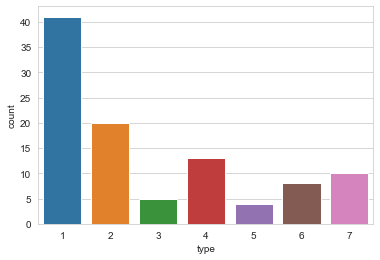

In [117]:
sns.countplot(x = 'type', data = data)

[]

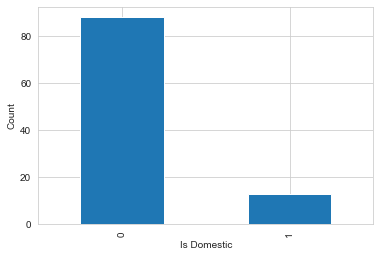

In [118]:
# Lets plot to check how many animals are domestic
plt.figure(figsize=(6,4))
data.domestic.value_counts().plot(kind="bar")
plt.xlabel('Is Domestic')
plt.ylabel("Count")
plt.plot()

In [119]:
pd.crosstab(data.type, data.domestic)


domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


[]

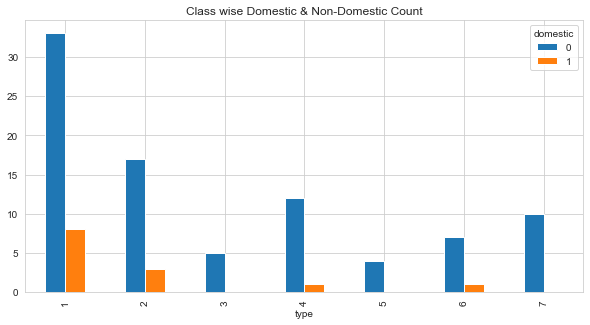

In [120]:
# Species wise domestic and non-domestic animals
pd.crosstab(data.type, data.domestic).plot(kind="bar", figsize=(10, 5), title="Class wise Domestic & Non-Domestic Count")
plt.plot()

In [121]:
# Lets see how many animals provides us milk
data.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

In [122]:
pd.crosstab(data.type, data.milk)

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


<AxesSubplot:title={'center':'Class wise Milk providing animals'}, xlabel='type'>

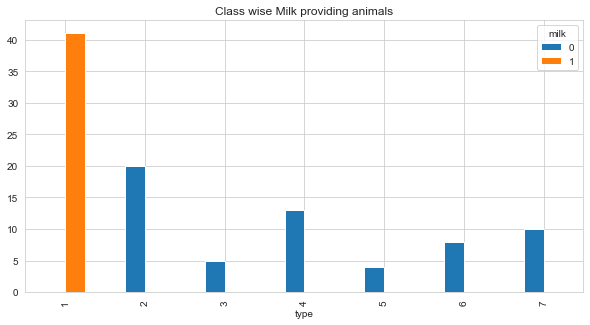

In [123]:
pd.crosstab(data.type, data.milk).plot(kind="bar", title="Class wise Milk providing animals", 
                                                         figsize=(10, 5))

In [124]:
# Lets see how many animals live under water. i.e aquatic
data.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [125]:
data[data.aquatic==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

<AxesSubplot:xlabel='type'>

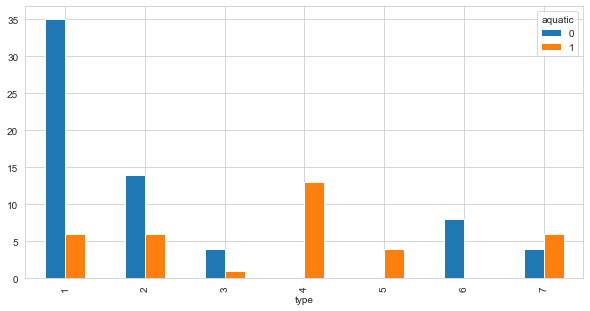

In [126]:
# Lets plot category wise animals having fins
pd.crosstab(data.type, data.aquatic).plot(kind="bar", figsize=(10, 5))

Text(0.5, 1.0, 'Features for the Animals')

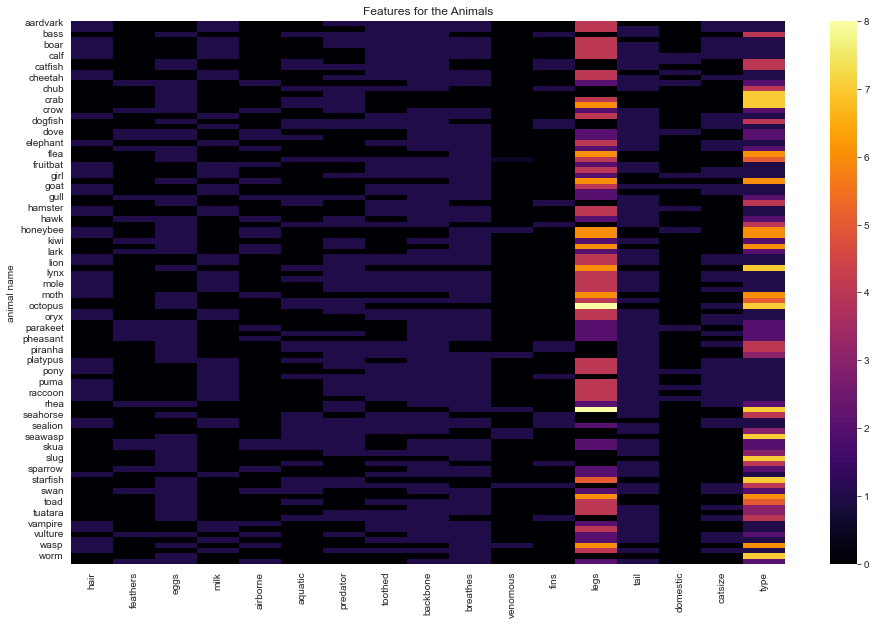

In [127]:
data_temp = data
data_temp = data_temp.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(data_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

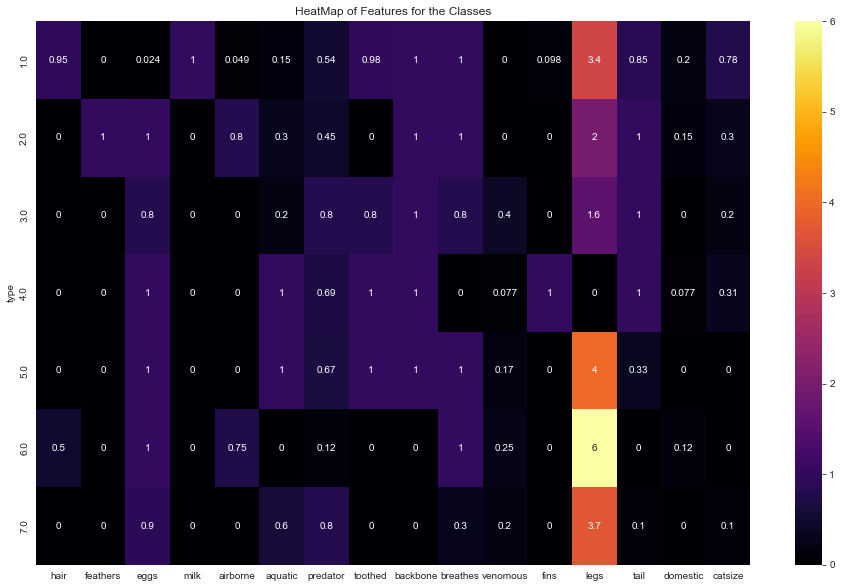

In [128]:
data_temp = data_temp.groupby(by='type').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(data_temp, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [129]:
# We will be removing column animal_name as it does not help us in classification
data1 = data.drop('animal name', axis = 1)
data1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [130]:
# Splitting data into X and y
X = data1.drop('type', axis = 1)
y = data['type']

In [131]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [132]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [133]:
# Split X and y into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [134]:
print('Shape of x_train: ', X_train.shape)
print('Shape of x_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (75, 16)
Shape of x_test:  (26, 16)
Shape of y_train:  (75,)
Shape of y_test:  (26,)


# Building KNN Model

In [135]:
# Fit k-nearest neighbors classifier with training sets for n = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [136]:
# Run prediction
y_pred = knn.predict(X_test)

In [137]:
y_pred

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 4,
       1, 2, 1, 1], dtype=int64)

In [138]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
pred_df

,Actual,Predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1
94,1,1
16,2,2
73,4,4
54,1,1
96,1,1


In [139]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.93      0.96      0.94        26



D:\Himani\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Himani\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Himani\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


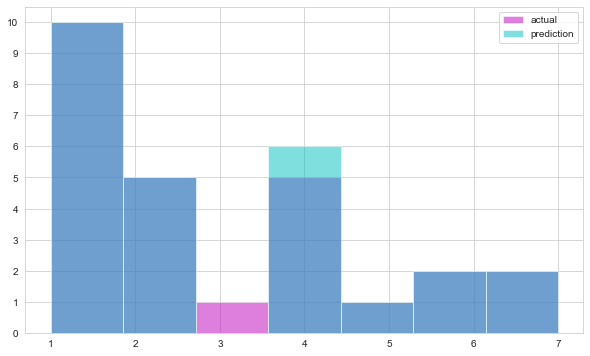

In [141]:
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 6) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

In [142]:
# Get score for different values of n
k_list = np.arange(1, 50, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score = cross_val_score(knn,X_train, y_train,cv=3)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)

Mean Scores:
[0.9199999999999999, 0.88, 0.8133333333333334, 0.7733333333333334, 0.7600000000000001, 0.7466666666666667, 0.7200000000000001, 0.64, 0.5866666666666668, 0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.56, 0.5333333333333333, 0.52, 0.48, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334]
Error Rate:
[0.0, 0.0, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.46153846153846156, 0.46153846153846156, 0.5, 0.5, 0.6153846153846154]


# Visualizing model performance for different numbers of K

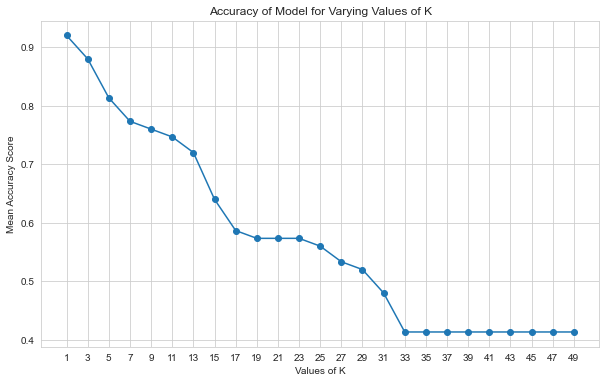

In [143]:
# Plot n values and average accuracy scores
plt.plot(k_list,mean_scores, marker='o')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

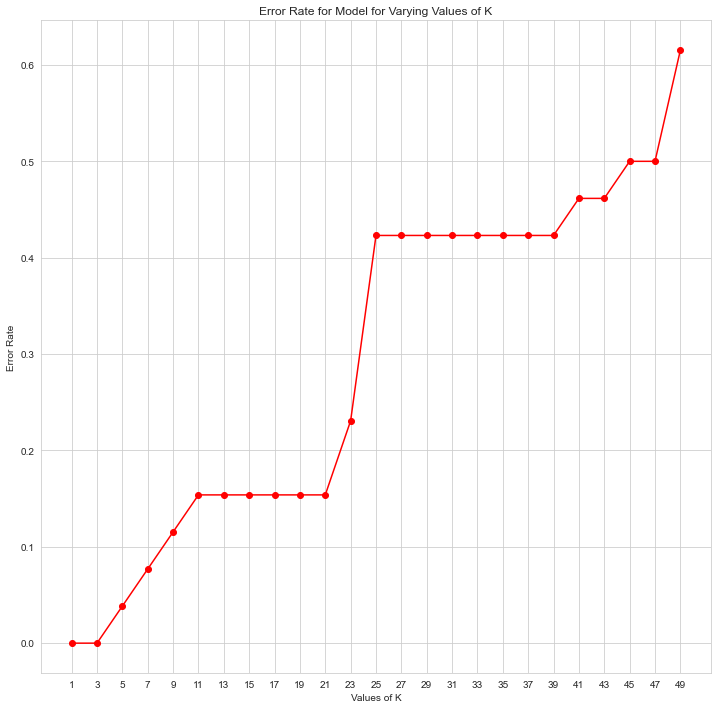

In [144]:
# Plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='r', marker = 'o')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12, 6) 

plt.show()

In [145]:
data1.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [146]:
data1['has_legs'] = np.where(data1['legs']>0,1,0)
data1 = data1[['hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
               'venomous','fins','legs','has_legs','tail','domestic','catsize','type']]
data1.head()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1


In [147]:
# Select columns to add to X and y sets
features = list(data1.columns.values)
features.remove('legs')
features.remove('type')
X2 = data1[features]
y2 = data1['type']

In [148]:
# Split X and y into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 0)

In [149]:
# Fit k-nearest neighbors classifier with training sets for n = 5
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X2_train, y2_train)

KNeighborsClassifier()

In [150]:
# Run prediction
y2_pred = knn2.predict(X2_test)

In [151]:
print(confusion_matrix(y2_test,y2_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


In [152]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



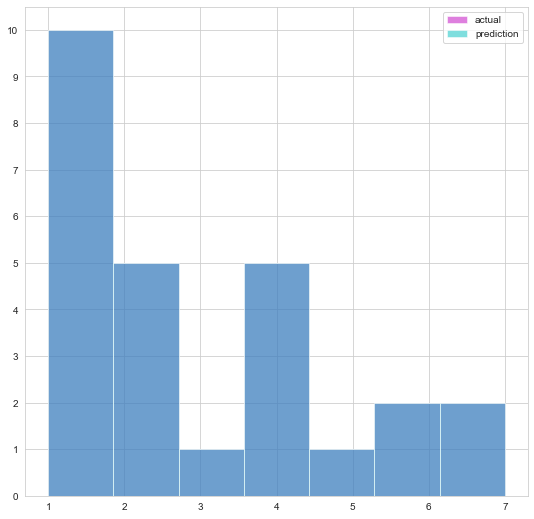

In [153]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y2_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y2_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()

In [154]:
# Get score for different values of n
k_list = np.arange(1, 50, 2)
mean_scores2 = []
accuracy_list2 = []
error_rate2 = []

for i in k_list:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train,y2_train)
    pred_i = knn2.predict(X2_test)
    score = cross_val_score(knn2,X2_train, y2_train,cv=3)
    mean_scores2.append(np.mean(score))
    error_rate2.append(np.mean(pred_i != y2_test))

print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)

Mean Scores:
[0.9199999999999999, 0.88, 0.8133333333333334, 0.7733333333333334, 0.7600000000000001, 0.7466666666666667, 0.7200000000000001, 0.64, 0.5866666666666668, 0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.56, 0.5333333333333333, 0.52, 0.48, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334]
Error Rate:
[0.0, 0.0, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.46153846153846156, 0.46153846153846156, 0.5, 0.5, 0.6153846153846154]


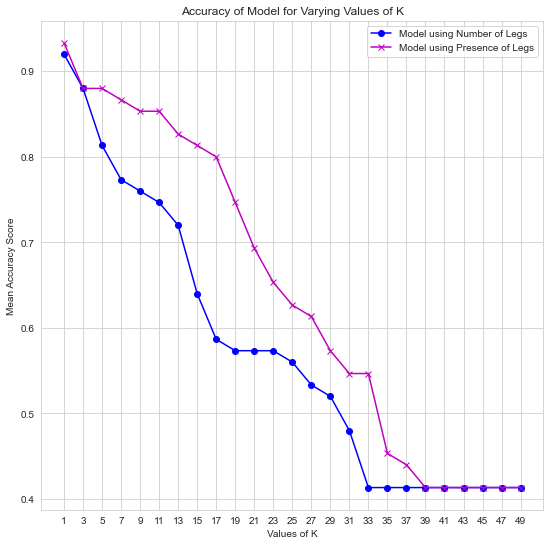

In [155]:
# Plot n values and average accuracy scores
plt.plot(k_list,mean_scores, color='b',marker='o', label='Model using Number of Legs')
plt.plot(k_list,mean_scores2, color='m',marker='x', label='Model using Presence of Legs')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

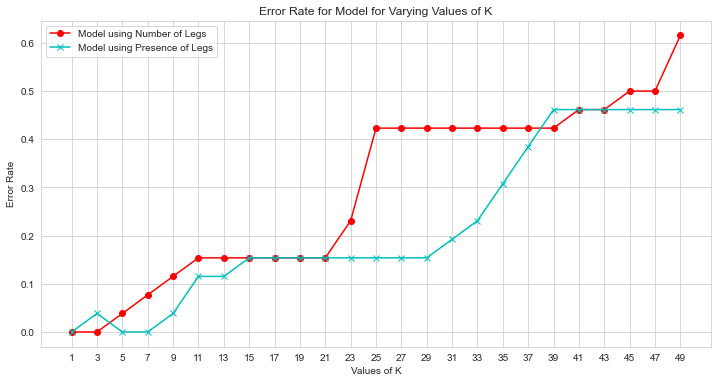

In [158]:
# Plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='r', marker = 'o', label='Model using Number of Legs')
plt.plot(k_list,error_rate2, color='c', marker = 'x', label='Model using Presence of Legs')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,6) 

plt.show()

# Inference


So interestingly, Replacing the feature legs with has_legs improved the
accuracy of KNN models at every value where n >3.
This may be due to the model taking the number of legs as a continuous,
numeric data point rather than as an enumerate

# Question 2

# Prepare a model for glass classification using KNN


In [159]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [160]:
# Loading dataset
data = pd.read_csv('glass.csv')

# EDA & Data Preprocessing

In [161]:
data.shape

(214, 10)

In [162]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [163]:
data.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
175,1.52119,12.97,0.33,1.51,73.39,0.13,11.27,0.00,0.28,5
138,1.51674,12.79,3.52,1.54,73.36,0.66,7.90,0.00,0.00,2
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
157,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00,3
130,1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.00,0.00,2
95,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00,2
48,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00,0.00,1
57,1.51824,12.87,3.48,1.29,72.95,0.60,8.43,0.00,0.00,1
45,1.51900,13.49,3.48,1.35,71.95,0.55,9.00,0.00,0.00,1
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [165]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [166]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [167]:
# Checking how many types of glass are present in dataset
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

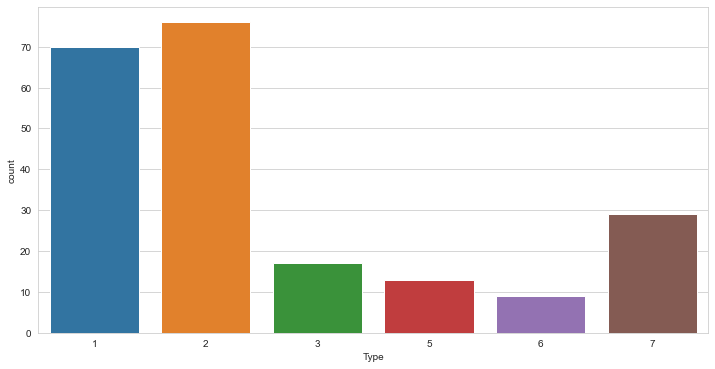

In [168]:
sns.countplot(x = 'Type', data = data)

<AxesSubplot:>

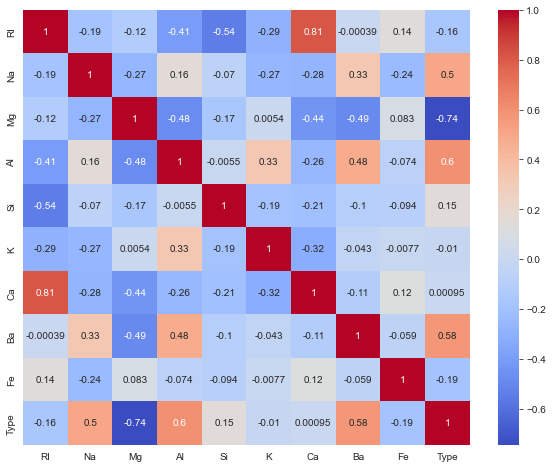

In [169]:
# Correlation heat map to see the relation between different parameters
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

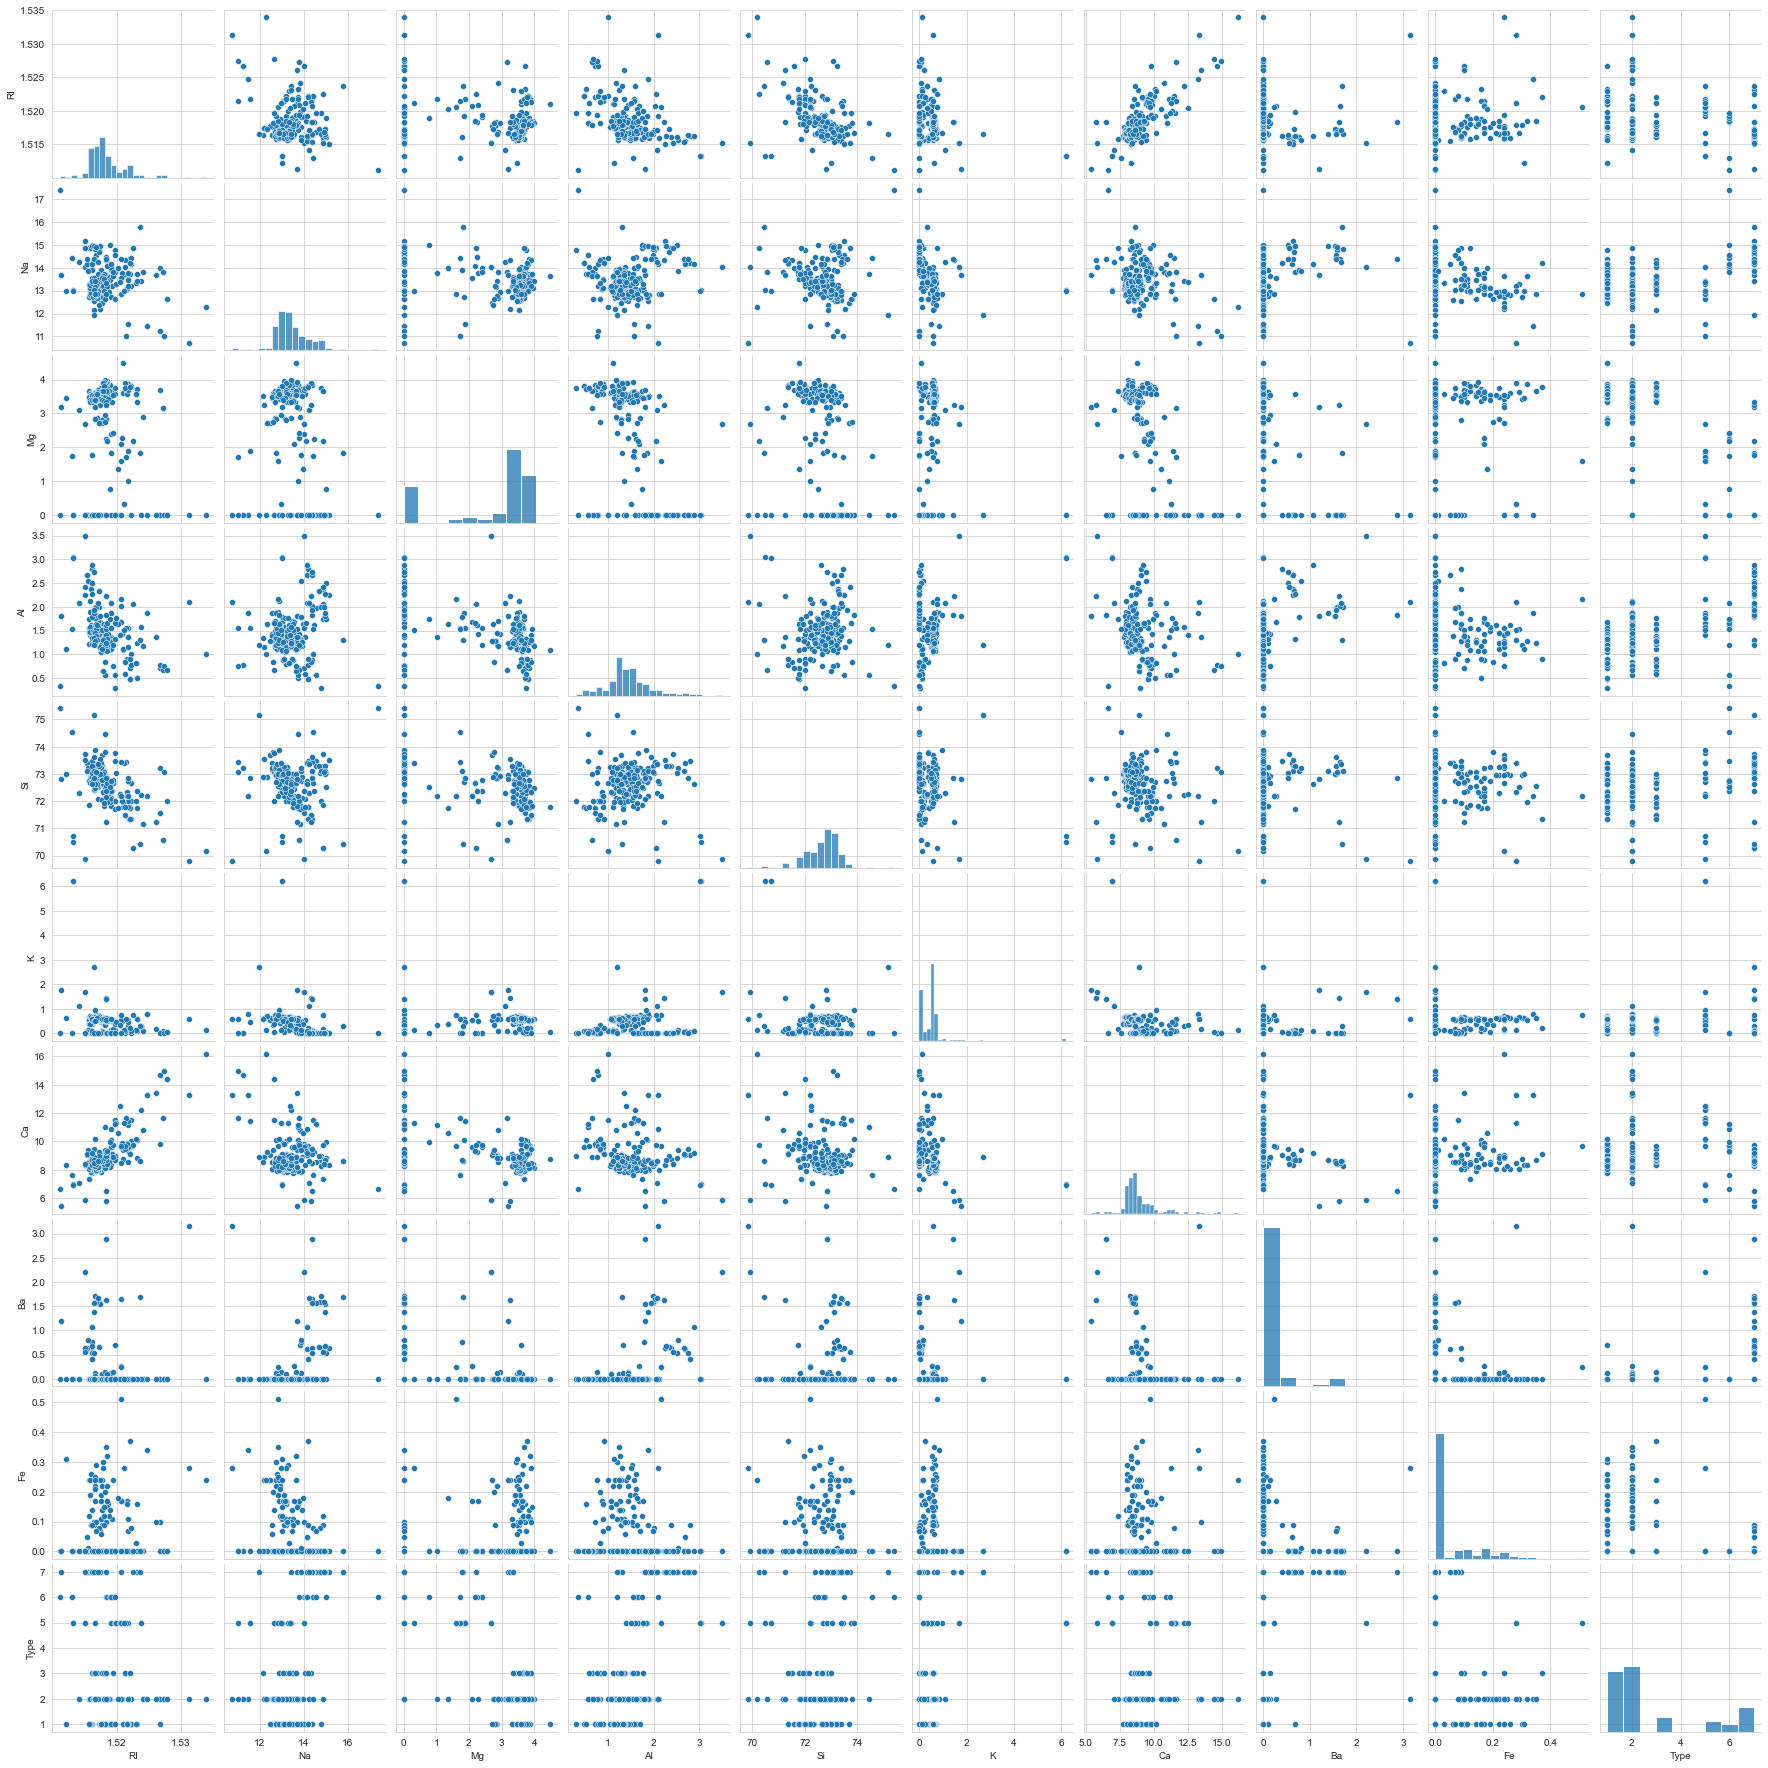

In [170]:
# plotting pairplot

sns.pairplot(data)

<AxesSubplot:xlabel='Type', ylabel='RI'>

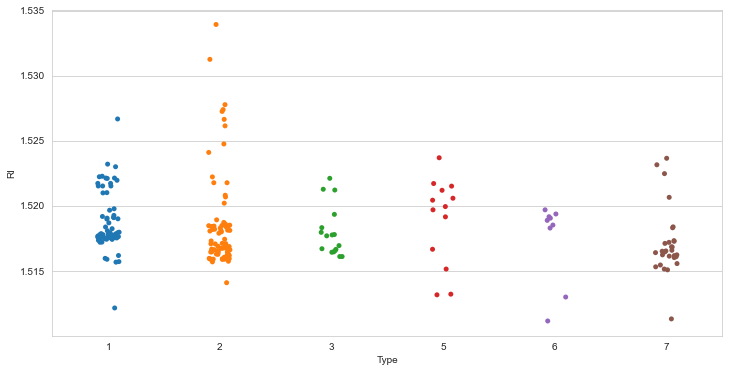

In [171]:
# Visualizing the content of different elements in the various types of glass

sns.stripplot(x='Type',y='RI',data=data)


<AxesSubplot:xlabel='Type', ylabel='Mg'>

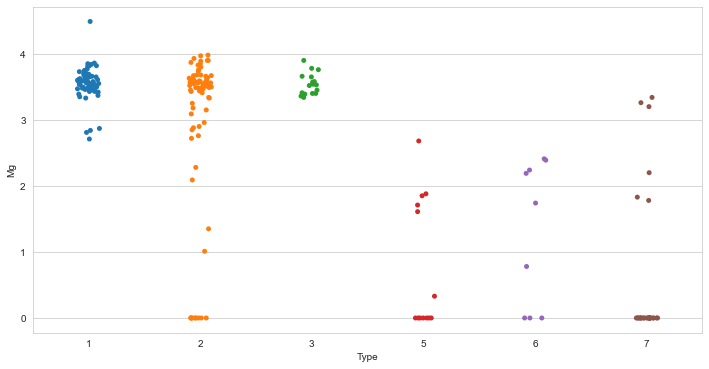

In [172]:
sns.stripplot(x='Type',y='Mg',data=data)

<AxesSubplot:xlabel='Type', ylabel='Na'>

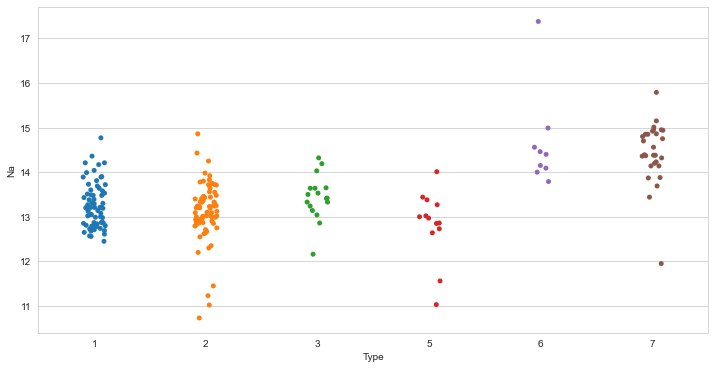

In [173]:
sns.stripplot(x='Type',y='Na',data=data)

<AxesSubplot:xlabel='Type', ylabel='Al'>

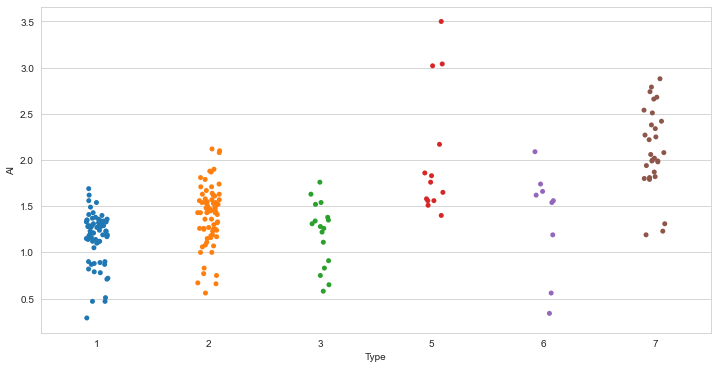

In [174]:
sns.stripplot(x='Type',y='Al',data=data)

<AxesSubplot:xlabel='Type', ylabel='Si'>

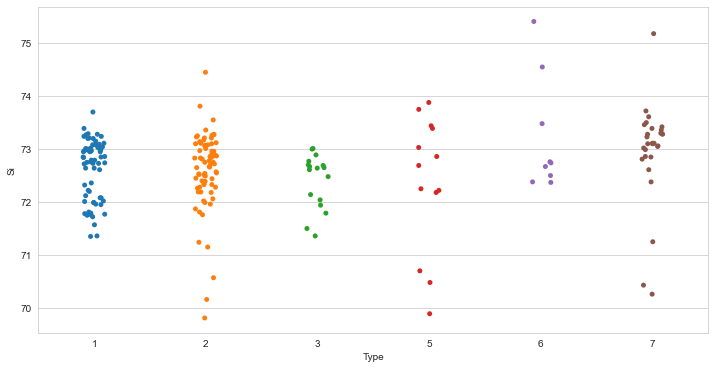

In [175]:
sns.stripplot(x='Type',y='Si',data=data)

<AxesSubplot:xlabel='Type', ylabel='K'>

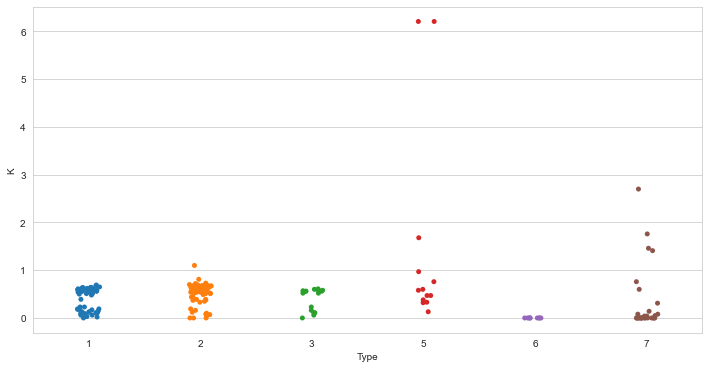

In [176]:
sns.stripplot(x='Type',y='K',data=data)

<AxesSubplot:xlabel='Type', ylabel='Ca'>

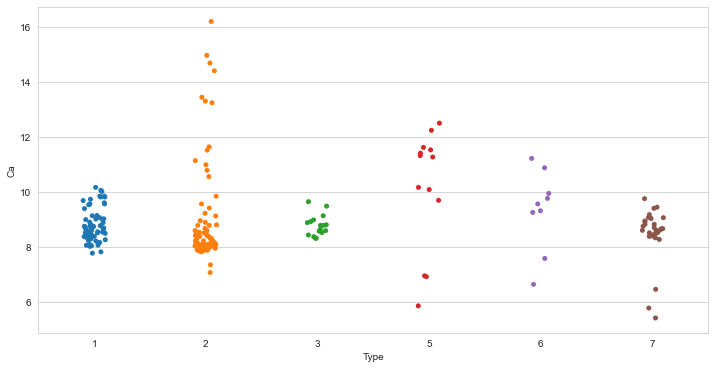

In [177]:
sns.stripplot(x='Type',y='Ca',data=data)

<AxesSubplot:xlabel='Type', ylabel='Ba'>

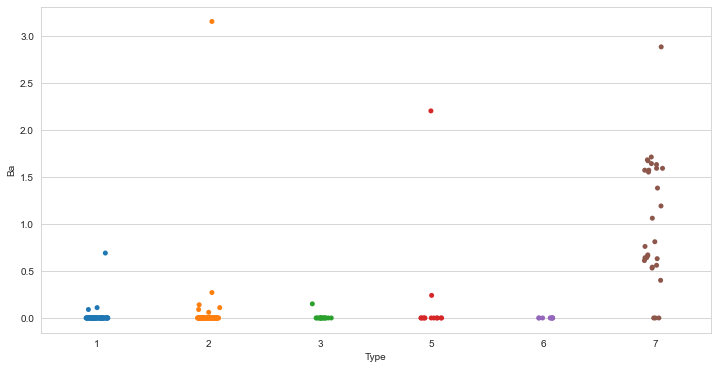

In [178]:
sns.stripplot(x='Type',y='Ba',data=data)

<AxesSubplot:xlabel='Type', ylabel='Fe'>

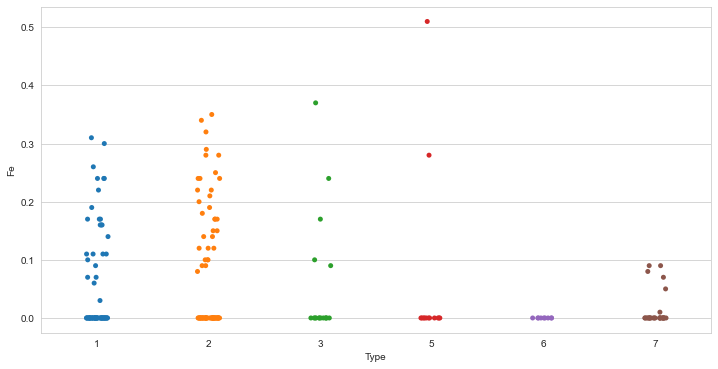

In [179]:
sns.stripplot(x='Type',y='Fe',data=data)

In [180]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [181]:
scaler.fit(data.drop('Type',axis=1))

StandardScaler()

In [182]:
scaled_features=scaler.transform(data.drop('Type',axis=1))
data_head=pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [183]:
data_head

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [184]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_head,data['Type'], test_size=0.3, random_state=42)

In [185]:

print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (149, 9)
Shape of x_test:  (65, 9)
Shape of y_train:  (149,)
Shape of y_test:  (65,)


# Building KNN Model

In [186]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [187]:
pred = model.predict(x_test)

In [188]:
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 7, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 7, 5, 1, 1, 2, 1, 7, 2, 2,
       2, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 7, 2],
      dtype=int64)

In [189]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_df

,Actual,Predicted
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2
...,...,...
5,1,2
135,2,2
56,1,1
199,7,7


In [190]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.650952380952381


In [191]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report ',classification_report(y_test,pred))

Classification Report                precision    recall  f1-score   support

           1       0.57      0.84      0.68        19
           2       0.59      0.57      0.58        23
           3       0.00      0.00      0.00         4
           5       0.67      0.33      0.44         6
           6       1.00      0.67      0.80         3
           7       0.90      0.90      0.90        10

    accuracy                           0.65        65
   macro avg       0.62      0.55      0.57        65
weighted avg       0.62      0.65      0.62        65



D:\Himani\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Himani\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Himani\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [192]:
# Printing confusion matrix
print('Confusion Matrix\n',confusion_matrix(y_test,pred))

Confusion Matrix
 [[16  3  0  0  0  0]
 [ 9 13  0  1  0  0]
 [ 2  2  0  0  0  0]
 [ 1  3  0  2  0  0]
 [ 0  0  0  0  2  1]
 [ 0  1  0  0  0  9]]


In [193]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'error_rate')

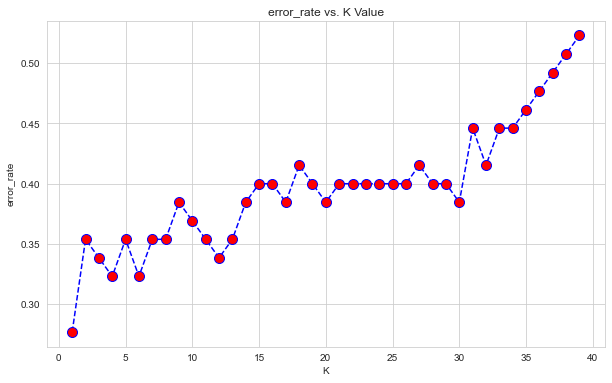

In [194]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('error_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('error_rate')

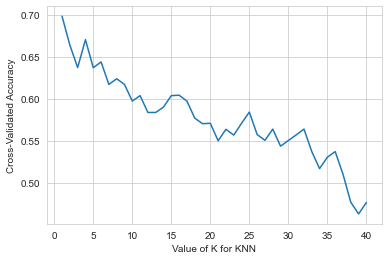

In [195]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# We can see that at K=1 we have low error rate and high value of accuracy. 
Hence we will perform the test with K=1

In [196]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [197]:
pred=knn.predict(x_test)

In [198]:
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 6, 1, 1, 6, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 2, 2, 3, 2, 1, 7, 5, 3, 2, 2, 1, 7, 3, 2,
       1, 6, 2, 3, 2, 1, 1, 1, 1, 2, 1, 2, 7, 1, 2, 1, 1, 2, 1, 7, 2],
      dtype=int64)

In [199]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_df

,Actual,Predicted
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2
...,...,...
5,1,1
135,2,2
56,1,1
199,7,7


In [200]:
kfold = KFold(n_splits=10)
results = cross_val_score(knn, x_train, y_train, cv=kfold)
print(results.mean())

0.699047619047619


In [201]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report ',classification_report(y_test,pred))

Classification Report                precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.68      0.65      0.67        23
           3       0.50      0.50      0.50         4
           5       1.00      0.33      0.50         6
           6       0.60      1.00      0.75         3
           7       1.00      0.90      0.95        10

    accuracy                           0.72        65
   macro avg       0.75      0.70      0.69        65
weighted avg       0.75      0.72      0.72        65



In [202]:
# Printing confusion matrix
print('Confusion Matrix\n',confusion_matrix(y_test,pred))


Confusion Matrix
 [[16  2  1  0  0  0]
 [ 6 15  1  0  1  0]
 [ 1  1  2  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  1  9]]


# We can see that accuracy is improved when K=1


D:\Himani\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

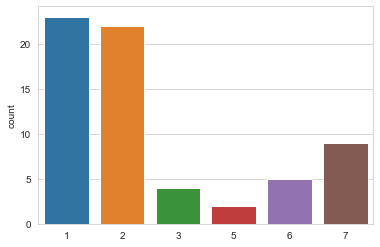

In [203]:
sns.countplot(pred)